## Imports and Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing statcast data from pybaseball package.

In [2]:
from pybaseball import statcast

Creating Pandas dataframe with statcast data for month of July in 2019 MLB season.

In [3]:
data = statcast(start_dt='2019-07-01', end_dt='2019-07-31')

This is a large query, it may take a moment to complete
Completed sub-query from 2019-07-01 to 2019-07-06
Completed sub-query from 2019-07-07 to 2019-07-12
Completed sub-query from 2019-07-13 to 2019-07-18
Completed sub-query from 2019-07-19 to 2019-07-24
Completed sub-query from 2019-07-25 to 2019-07-30
Completed sub-query from 2019-07-31 to 2019-07-31


## Data Definition

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110615 entries, 0 to 110614
Data columns (total 90 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   index                            110615 non-null  int64         
 1   pitch_type                       110314 non-null  object        
 2   game_date                        110615 non-null  datetime64[ns]
 3   release_speed                    110327 non-null  float64       
 4   release_pos_x                    110323 non-null  float64       
 5   release_pos_z                    110323 non-null  float64       
 6   player_name                      110615 non-null  object        
 7   batter                           110615 non-null  float64       
 8   pitcher                          110615 non-null  float64       
 9   events                           28216 non-null   object        
 10  description                      110615 non-

In [5]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,1778,1839,1867,1932,1956,1990,2054,2096,2179,2256
pitch_type,SI,SL,SL,FF,FF,FF,FF,SI,FF,FF
game_date,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00
release_speed,101.0,88.1,85.8,96.5,96.8,97.5,97.9,100.5,99.8,98.0
release_pos_x,0.56,0.55,0.39,0.72,0.5,0.62,0.58,0.57,0.62,0.63
...,...,...,...,...,...,...,...,...,...,...
post_home_score,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
post_bat_score,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
post_fld_score,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
if_fielding_alignment,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard


There are a number of depricated fields in the data with no associated values. These fields are old inputs from the MLB tracking system prior to Statcast (https://baseballsavant.mlb.com/csv-docs). A number of values are also expected to have some null values given the nature of pitch level data. Not all pitches will result in a hit or will have runners on base.

In [6]:
#Dropping deprecated fields from old tracking system
data.drop(columns=['umpire', 'spin_dir', 'tfs_deprecated', 'break_angle_deprecated', 'spin_rate_deprecated', 
           'break_length_deprecated', 'tfs_zulu_deprecated'], inplace=True )

With pitch_type as our target value, and every pitch thrown should have a type, I'm interested in the null values for pitch_type.

In [7]:
data[data['pitch_type'].isnull()]

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
4057,1913,NaN,2019-07-31,NaN,NaN,NaN,"Norris, Daniel",592743.0,596057.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
7525,3868,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,field_out,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7526,4077,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,NaN,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7527,4195,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,NaN,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7528,4229,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",596019.0,532077.0,field_out,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100782,16116,NaN,2019-07-03,96.3,-1.58,5.31,"Webb, Jacob",547180.0,657097.0,NaN,...,9.0,2.0,2.0,9.0,2.0,9.0,2.0,9.0,Infield shift,Standard
102317,15602,NaN,2019-07-03,NaN,NaN,NaN,"Perdomo, Luis",607680.0,606131.0,hit_by_pitch,...,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,Standard,Standard
102466,14601,NaN,2019-07-03,NaN,NaN,NaN,"Quantrill, Cal",607680.0,615698.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
109972,21775,NaN,2019-07-01,NaN,NaN,NaN,"Allen, Logan",596103.0,663531.0,field_out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Strategic


In [8]:
data[data['pitch_type'].isnull()].groupby('game_date')['game_date'].count()

game_date
2019-07-01      2
2019-07-03      4
2019-07-04      4
2019-07-05      3
2019-07-06      5
2019-07-12      4
2019-07-13      2
2019-07-14      1
2019-07-15      1
2019-07-16      1
2019-07-17      4
2019-07-18      1
2019-07-19      1
2019-07-20      1
2019-07-21      3
2019-07-22      1
2019-07-23      3
2019-07-25      2
2019-07-26      1
2019-07-27      1
2019-07-30    255
2019-07-31      1
Name: game_date, dtype: int64

Looks like Statcast is prone to miss 1-4 pitches per day. Could be wild pitches outside of the capture zone, or the system isn't perfect and has an error rate. 7/30 appears to have had an entire game or two where the system did not work at all:

In [9]:
data['game_date'] = pd.to_datetime(data['game_date'])

In [12]:
July30 = data.loc[data['game_date'] == pd.to_datetime('2019-07-30')]
July30.loc[July30['pitch_type'].isnull()]['player_name'].value_counts()

Bieber, Shane        108
Verlander, Justin    105
Harris, Will          19
Clippard, Tyler        8
Wittgren, Nick         8
Osuna, Roberto         6
Price, David           1
Name: player_name, dtype: int64

In [13]:
July30.loc[July30['pitch_type'].isnull()]['game_pk'].value_counts()

565369.0    254
565080.0      1
Name: game_pk, dtype: int64

The pitcher list of null values were mostly pitchers in a single game with ID = 565369. Only 1 pitch was not part of the apparent game without a working Statcast, and that is aligned with other daily values. I'm still curious about the other null values and want to check the description of the resultant pitches with missing pitch_type values.

In [14]:
data.loc[data['pitch_type'].isnull()]['description'].value_counts()

ball                       97
foul                       56
called_strike              56
hit_into_play              43
swinging_strike            38
swinging_strike_blocked     5
blocked_ball                4
hit_by_pitch                1
foul_bunt                   1
Name: description, dtype: int64

In [15]:
data['pitch_type'].isnull().sum() / len(data['pitch_type']) * 100

0.2721149934457352

Null values do not appear to be due to wild pitches given the called strikes and contacts (foul and hit_into_play). I think it's fair to say the Statcast tracking system is able to capture 99.7% of the pitch types, with a missed call rate of 0.3% based on above. I'll need to consider how to handle this later as removing a single pitch from an at bat won't accurately represent the sequence of pitches in the at bat. This won't be a problem if we take more of a macro approach to predicting pitches.

In [18]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing[missing['count'] > 0].sort_values(by='count', ascending=False)

,count,%
sv_id,110615,100.000000
on_3b,100659,90.999412
estimated_ba_using_speedangle,91646,82.851331
launch_speed_angle,91646,82.851331
estimated_woba_using_speedangle,91646,82.851331
hc_x,91484,82.704877
hc_y,91484,82.704877
bb_type,91450,82.674140
on_2b,90384,81.710437
hit_location,85995,77.742621


I expect a lot of features to have null values due to the nature of the data. For example, data associated with a hit (launch_speed_angle, hit_location) will be null for pitches that do not result in a hit. 

In [24]:
objects = data.select_dtypes('object')
for i in objects:
    print(objects[i].value_counts(),'\n')

FF    40020
SL    19666
CH    12350
FT     9638
CU     9160
SI     8181
FC     7153
KC     2586
FS     1480
KN       50
FO       25
EP        5
Name: pitch_type, dtype: int64 

Bauer, Trevor         666
Nola, Aaron           632
Keuchel, Dallas       611
Corbin, Patrick       607
Junis, Jakob          598
                     ... 
Ríos, Yacksel          11
Strickland, Hunter      9
Barraclough, Kyle       8
Stallings, Jacob        7
Peraza, José            4
Name: player_name, Length: 538, dtype: int64 

field_out                       10907
strikeout                        6522
single                           3999
walk                             2183
double                           1363
home_run                         1057
force_out                         528
grounded_into_double_play         525
hit_by_pitch                      281
field_error                       214
sac_fly                           172
triple                            121
sac_bunt                          

All object type features above have values as expected. 

## Target Feature

Diving into the target feature, pitch_type:

In [43]:
pitch_counts = pd.concat([100 * data['pitch_type'].value_counts(normalize=True).round(3), data['pitch_type'].value_counts()], axis=1)
pitch_counts.columns = ['%', 'count']
pitch_counts

,%,count
FF,36.3,40020
SL,17.8,19667
CH,11.2,12332
FT,8.7,9646
CU,8.3,9160
SI,7.4,8173
FC,6.5,7153
KC,2.3,2586
FS,1.4,1497
KN,0.0,50


Fastballs (FF & FT) account for 45% of all pitches, plus sliders and changeups to capture the majority at 74%.

Curveball (CU)
Cutter (FC)
Eephus (EP)
Forkball (FO)
Four-Seam Fastball (FA)
Knuckleball (KN)
Knuckle-curve (KC)
Screwball (SC)
Sinker (SI)
Slider (SL)
Splitter (FS)
Two-Seam Fastball (FT)

In [120]:
data['pitch_type'].describe()

count     110314
unique        12
top           FF
freq       40020
Name: pitch_type, dtype: object

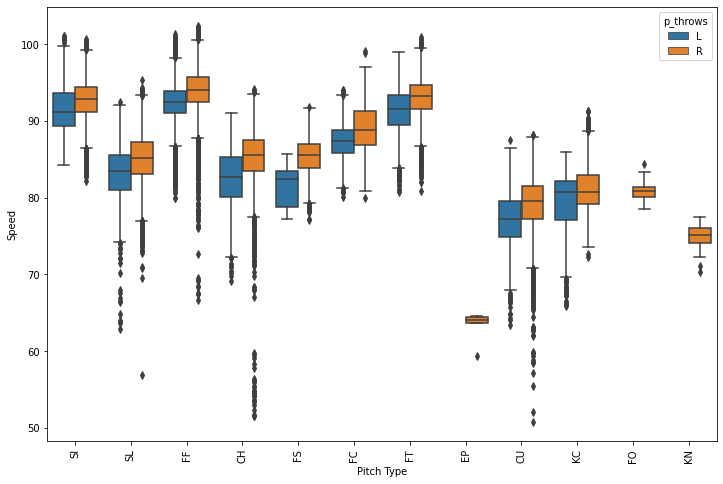

In [19]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='pitch_type', y='release_speed', hue='p_throws', data=data)
plt.xticks(rotation='vertical')
plt.ylabel('Speed')
plt.xlabel('Pitch Type');


The boxplot above shows that right handed pitchers tend to throw faster pitches for all pitch types. They also have a larger range, especially on the slow end, than left handed pitchers. The plot below confirms the same using effective_speed in place of release_speed.

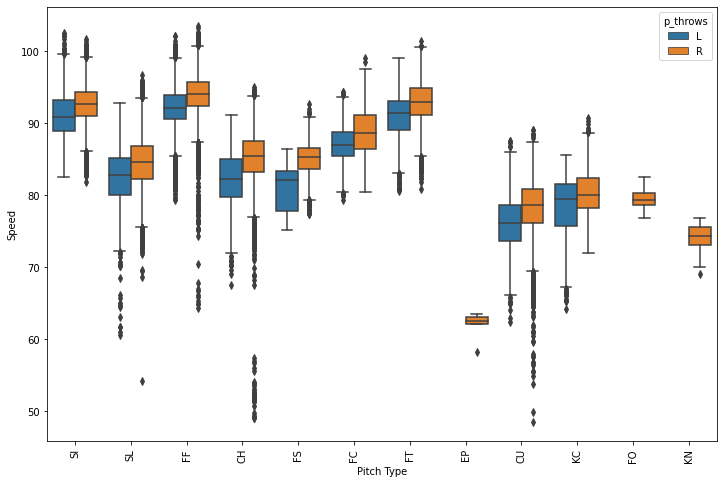

In [20]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='pitch_type', y='effective_speed', hue='p_throws', data=data)
plt.xticks(rotation='vertical')
plt.ylabel('Speed')
plt.xlabel('Pitch Type');

In [21]:
data[['pitch_type','release_speed']].nunique()

pitch_type        12
release_speed    416
dtype: int64

## Feature Engineering

In [38]:
full_vals = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
full_vals.columns=['count', '%']
full_vals[full_vals['count'] == 0].sort_values(by='count', ascending=False)

,count,%
index,0,0.0
game_pk,0,0.0
post_bat_score,0,0.0
post_home_score,0,0.0
post_away_score,0,0.0
fld_score,0,0.0
bat_score,0,0.0
away_score,0,0.0
home_score,0,0.0
pitch_number,0,0.0


The above confirms we have plenty of features with complete values for all observations. With domain knowledge of the sport and after reviewing feature descriptions found in this link: https://baseballsavant.mlb.com/csv-docs, I will drop the features listed below:

'player_name', 'des', 'game_type', 'home_team', 'away_team', 'game_year', 'sv_id', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value'

In [29]:
data.drop(columns=['player_name', 'des', 'game_type', 'home_team', 'away_team', 'game_year', 'sv_id', 'fielder_3', 
                   'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 
                   'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 
                   'babip_value', 'iso_value'], inplace=True )

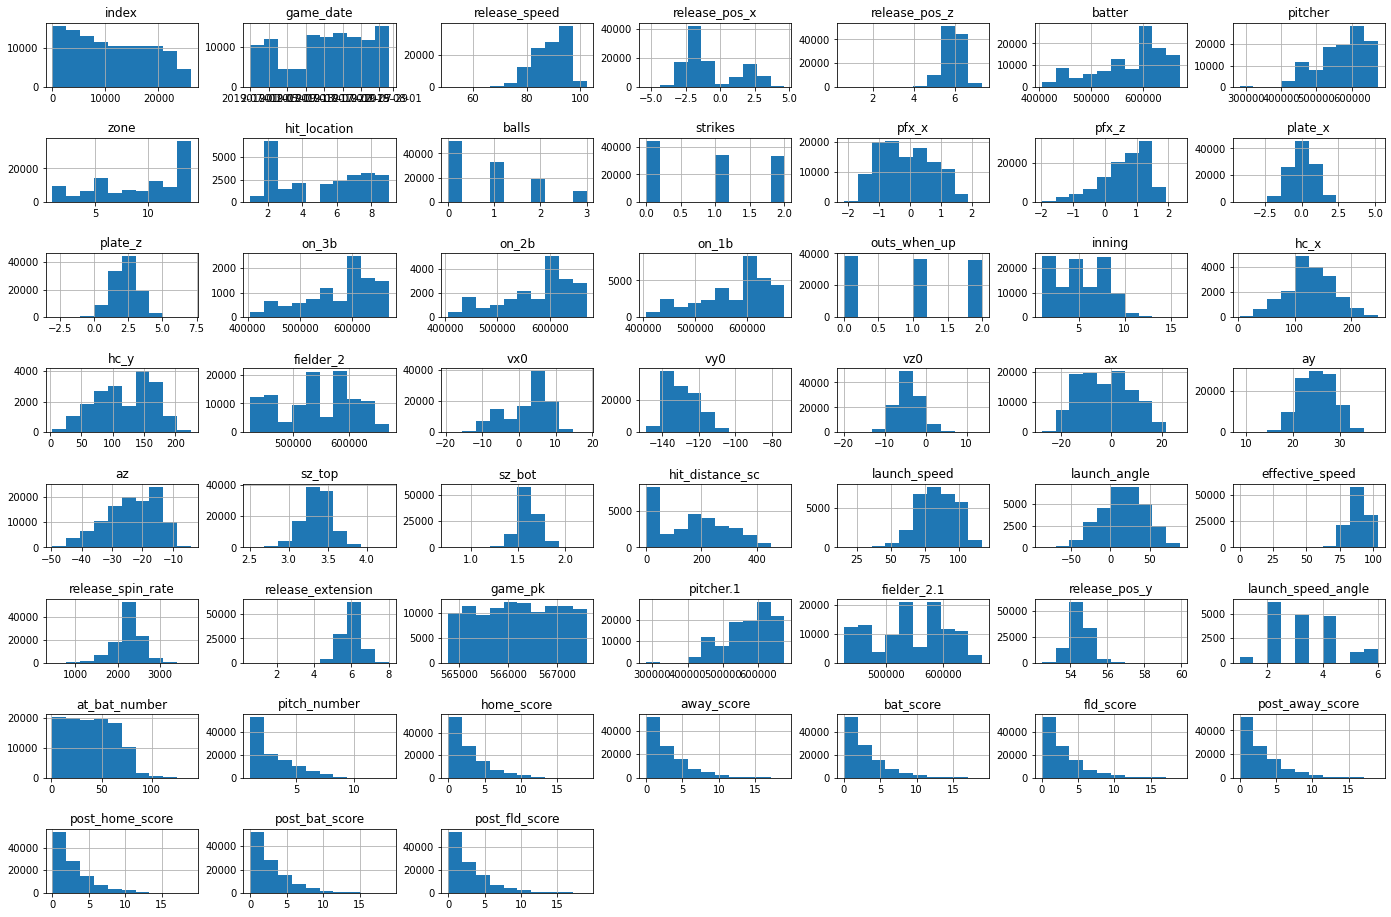

In [37]:
data.hist(figsize=(24,16))
plt.subplots_adjust(hspace=.8);

The distribution for values within each feature are aligned with my expectations. No concerns remain with any individual features at this time.

In [40]:
data.head().T

,0,1,2,3,4
index,1778,1839,1867,1932,1956
pitch_type,SI,SL,SL,FF,FF
game_date,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00
release_speed,101.0,88.1,85.8,96.5,96.8
release_pos_x,0.56,0.55,0.39,0.72,0.5
...,...,...,...,...,...
post_home_score,7.0,7.0,7.0,7.0,7.0
post_bat_score,5.0,5.0,5.0,5.0,5.0
post_fld_score,7.0,7.0,7.0,7.0,7.0
if_fielding_alignment,Standard,Standard,Standard,Standard,Standard


## Summary

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110615 entries, 0 to 110614
Data columns (total 63 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  110615 non-null  int64         
 1   pitch_type             110314 non-null  object        
 2   game_date              110615 non-null  datetime64[ns]
 3   release_speed          110327 non-null  float64       
 4   release_pos_x          110323 non-null  float64       
 5   release_pos_z          110323 non-null  float64       
 6   batter                 110615 non-null  float64       
 7   pitcher                110615 non-null  float64       
 8   events                 28216 non-null   object        
 9   description            110615 non-null  object        
 10  zone                   110323 non-null  float64       
 11  stand                  110615 non-null  object        
 12  p_throws               110615 non-null  obje

In [42]:
data['at_bat_number'].nunique()

139

In [46]:
data['at_bat_number'].describe()

count    110615.000000
mean         39.697889
std          23.584122
min           1.000000
25%          19.000000
50%          39.000000
75%          59.000000
max         139.000000
Name: at_bat_number, dtype: float64

In [48]:
data['game_pk'].value_counts()

564784.0    571
565753.0    461
565071.0    457
566517.0    453
567012.0    432
           ... 
567310.0    232
565363.0    231
566036.0    225
566516.0    216
566037.0    214
Name: game_pk, Length: 366, dtype: int64

I loaded just over 100k observations of pitch-level data with 90 features using the Python package Pybaseball. After reviewing some of the features in greater detail, combined with a review of the documenation explaining each feature, I decided to drop almost 30 features. This leaves me with 62 features and over 100k pitches. Moving into the next step, I will need to determine the methodology for prediction. Specifically, I need to decide if I should arrange the data to reference prior pitches, in a respective at-bat, so that predictions consider more than treating each pitch as an independent event. 

## Save Data

In [56]:
data.shape

(110615, 63)

In [57]:
pwd

'C:\\Users\\Louie\\GitHub\\Capstone2_Project'

In [58]:
data.to_csv(r'C:\\Users\\Louie\\GitHub\\Capstone2_Project\data_cleaned.csv', index = False)